# Predicting Evergreeness of Content with Decision Trees and Random Forests

Author: Arun Ahuja, James Larkin, et al.

#### A note on packages in this notebook
If you want to give this full notebook a try you will need to install the following from command line:    
- conda install python-graphviz  
- conda install pydotplus 

Don't feel like it?  
No problem, comment out import pydotplus import in cell 1 and the graphviz code block in cell 25 

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
 
# Read in the stumbleupon.tsv data - notice the use of the "sep" parameter here.
# This is tab-separated file and not a comma-separated file, so the "sep"
# parameter is set to "\t" to denote tab.
data = pd.read_csv("./stumbleupon.tsv", sep='\t')
data.head(2)

/Users/tiffanykelly/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1


In [2]:
# View what is in the boilerplate JSON feature
data["boilerplate"][1]

'{"title":"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races","body":"And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a trigger and the race starts Boom What people don t consider When a conventional gun goes off the sound travels to the ears of the closest runner a fraction of a second sooner than the others That s just enough to matter and why the latest starting pistol has traded in the mechanical boom for orchestrated electronic noise Omega has been the watch company tasked as the official timekeeper of the Olympic Games since 1932 At the 2010 Vancouv

In [3]:
# Use the map, json.loads and get methods to extract json 
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [4]:
# Check new columns in dataset 
data.head(2)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...


In [5]:
print(data['title'][1])
print(data['body'][1])

The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races
And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a trigger and the race starts Boom What people don t consider When a conventional gun goes off the sound travels to the ears of the closest runner a fraction of a second sooner than the others That s just enough to matter and why the latest starting pistol has traded in the mechanical boom for orchestrated electronic noise Omega has been the watch company tasked as the official timekeeper of the Olympic Games since 1932 At the 2010 Vancouver games they debute

In [6]:
# Check the dimensions of your new dataset
data.shape

(7395, 29)

In [7]:
# Check for missing values
data.isnull().sum()

url                                0
urlid                              0
boilerplate                        0
alchemy_category                   0
alchemy_category_score             0
avglinksize                        0
commonlinkratio_1                  0
commonlinkratio_2                  0
commonlinkratio_3                  0
commonlinkratio_4                  0
compression_ratio                  0
embed_ratio                        0
framebased                         0
frameTagRatio                      0
hasDomainLink                      0
html_ratio                         0
image_ratio                        0
is_news                            0
lengthyLinkDomain                  0
linkwordscore                      0
news_front_page                    0
non_markup_alphanum_characters     0
numberOfLinks                      0
numwords_in_url                    0
parametrizedLinkRatio              0
spelling_errors_ratio              0
label                              0
t

In [8]:
# Address missing values by dropping rows with missing values
data.dropna(inplace=True)

In [9]:
# Spot check your work
data.isnull().sum()

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
label                             0
title                       

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are "evergreen" sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs below where label = 1 are "evergreen" websites

In [10]:
data[['url', 'label']].head()

,url,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,0
1,http://www.popsci.com/technology/article/2012-...,1
2,http://www.menshealth.com/health/flu-fighting-...,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,1
4,http://bleacherreport.com/articles/1205138-the...,0


### Exercises to Get Us Started

 ### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites.
 ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?

### Exercise: 3. Does being a news site affect evergreeness? 
Compute and/or plot the percentage of news related evergreen sites.

In [11]:
# Return the mean of labels grouped by "is_news"
data.groupby(['is_news'])[['label']].mean()

,label
is_news,
1,0.516545
?,0.509207


In [12]:
# Replace ? is_news label to 0
data.is_news = data.is_news.replace(to_replace='?', value = 0)

In [13]:
# Return the mean of labels grouped by "is_news"
data.groupby(['is_news'])[['label']].mean()

,label
is_news,
0,0.509207
1,0.516545


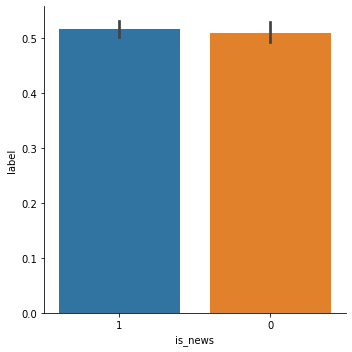

In [14]:
# A visualized version of the output above
sns.catplot(x='is_news', y='label', kind='bar', data = data);

### Exercise: 4. Does category in general affect evergreeness? 

Compute and/or plot the rate of evergreen sites for all Alchemy categories.

In [20]:
# Return the mean of labels grouped by "alchemy_category"


In [25]:
# A visualization of the category mean output above with rotated x-axis labels
p = sns.catplot(x='alchemy_category', y='label', kind='bar', data = data, height = 8)
p.set_xticklabels(rotation=45, horizontalalignment='right');

### Exercise: 5. How many articles are there per alchemy category?
Compute and/or plot the count of evergreen sites for all Alchemy categories.

In [27]:
# Return the count of labels grouped by "alchemy_category"


In [34]:
# A visualization of the category count output above with rotated x-axis labels
p = sns.catplot(x='alchemy_category', y='label', kind='bar', data = data,
                 height = 8, estimator=len)
p.set_xticklabels(rotation=45, horizontalalignment='right');

> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [15]:
# Option 1: Create a function to check for this

# Try/Except: If an error is encountered, the try block code execution
# is stopped and transferred down to the except block.
def has_recipe(text_in):
    try:
        if 'recipe' in str(text_in).lower():
            return 1
        else:
            return 0
    except: 
        return 0

# Map our newly created function to the title column in our dataset
# and assign the output of 1's and 0's to a new data column "recipe"
data['recipe'] = data['title'].map(has_recipe)

# Option 2: lambda functions

#data['recipe'] = data['title'].map(lambda t: 1 if 'recipe' in str(t).lower() else 0)

# Option 3: string functions

# Similar to above but the output will be bools 
# (true/false) instead of 1's and 0's.

#data['recipe'] = data['title'].str.contains('recipe')

In [16]:
data.head(1)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body,recipe
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,0,5424,170,8,0.152941,0.07913,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...,0


In [18]:
# In this newly created column, check to see how many pages had recipe in the the title.
data.recipe.value_counts()

0    6399
1     928
Name: recipe, dtype: int64

## Decision Trees in scikit-learn

###  Let's Explore Some Decision Trees:

`In essence, decision trees are just a sequence of "if this, then that" conditions.`

`1. They are non-parametric (no assumptions about the distribution(s) of your data).`<br>
`2. No coefficients`

 ### Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

In [19]:
# Import the DecisionTree Classifier from scikit's tree module
from sklearn.tree import DecisionTreeClassifier

# Instantiate your dtc object as assign it to the variable name "model"
model = DecisionTreeClassifier()

# Select your features
X = data[['image_ratio', 'html_ratio', 'recipe']]

# Set your target variable
y = data['label']
    
    
# Fit the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)
from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

### Now we're going to take a sample of our data and attempt to visualize it right inside the notebook.

`The full X and y would not output in Jupyter notebook. Attempts were a real kernel killer.`

### The way a decision tree works is that it attempts to find the decision that will best segregate the classes.

`When entropy is 1, the classes are balanced and when entropy is 0 everything is the same class.` 

In [20]:
#graph_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
graph_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Setting class_weight to 'balanced' will replicate the 
# minority class until the two classes have equal representation

# When proportion=True, the output is the fraction of records 
# for each class that have reached that node.

graph_X = X[:200]
graph_y = y[:200]

In [21]:
print(graph_X.shape)
print(graph_y.shape)

(200, 3)
(200,)


In [48]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

In [22]:
graph_model.fit(graph_X, graph_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

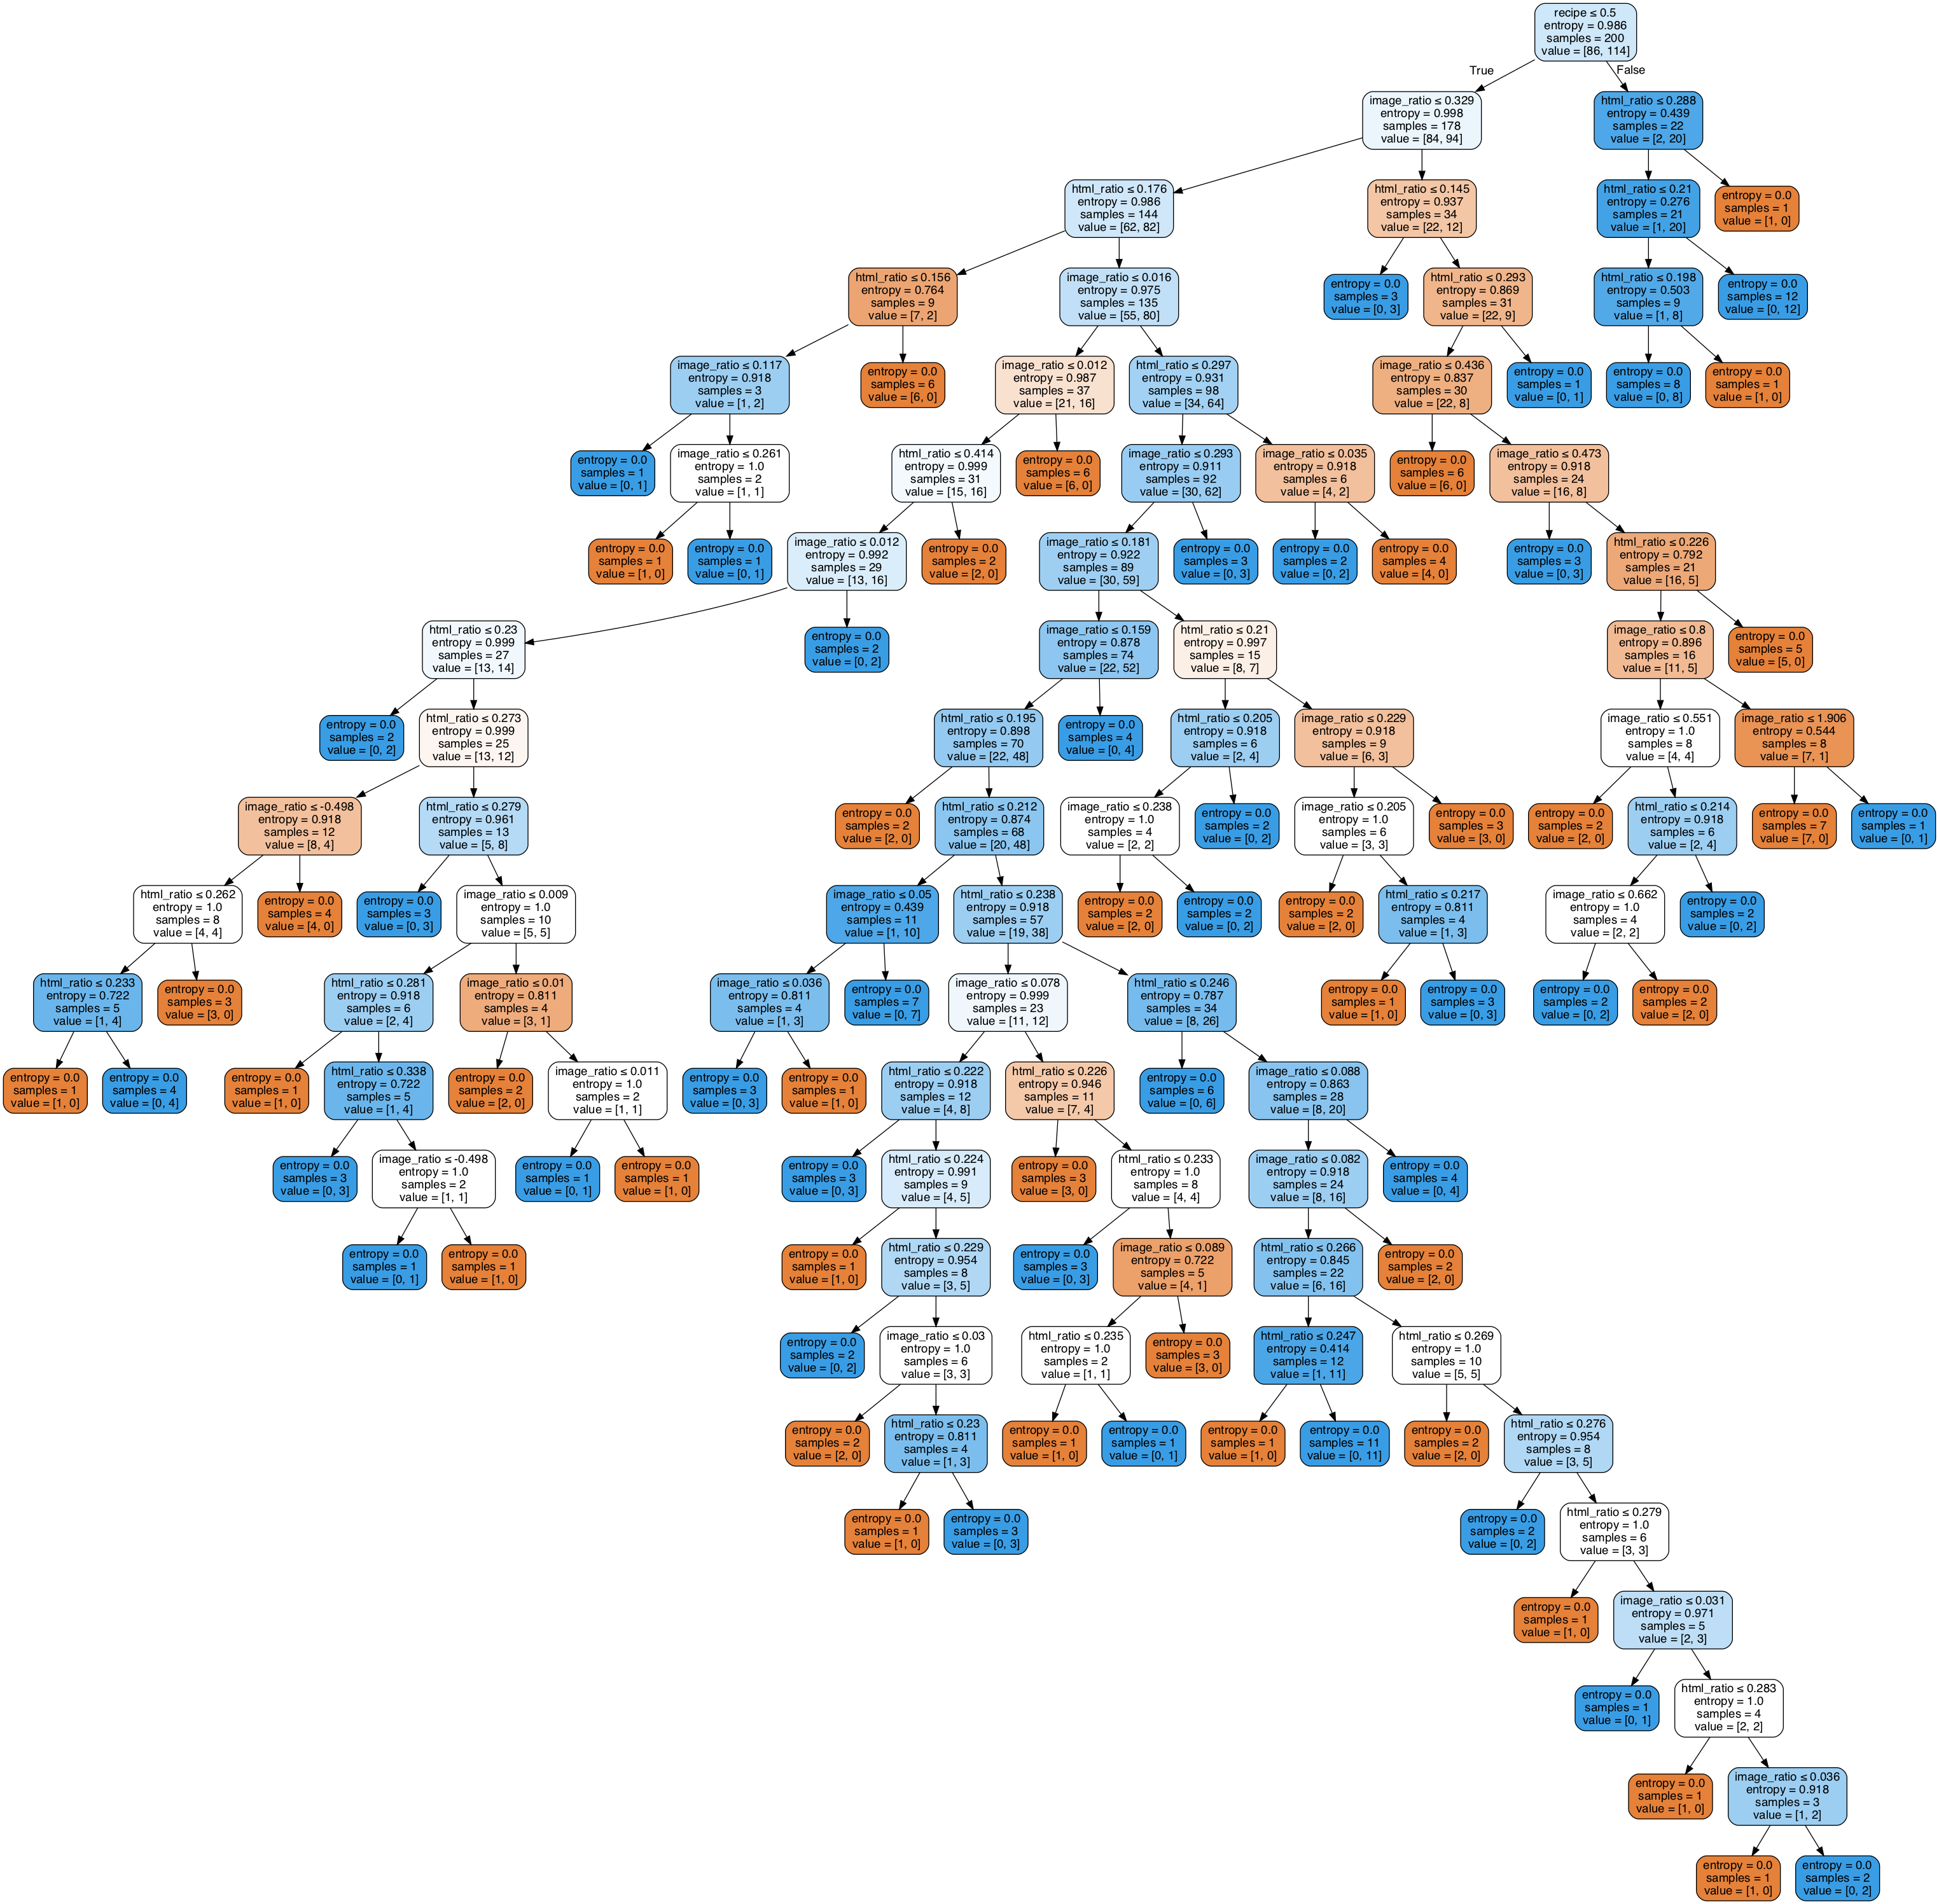

In [23]:
dot_data = tree.export_graphviz(graph_model, out_file=None, feature_names=X.columns,
                                filled=True, rounded=True, special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

`If we don't put any limits on the decision tree classifier, what do you see? It just continues splitting until entropy is zero (all examples in that node are in the same class).` 

`Q: Why might that be a problem?`

A. 

 ### Demo: Evaluate the decision tree we just created using cross-validation; use AUC as the evaluation metric.

In [50]:
from sklearn.model_selection import cross_val_score

# model is the estimator or the object to used to fit the data.
# X is your features, y is your target. You then select a scoring method -
# here we choose area under the curve (auc) as the evaluation metric. 
# cv: the number of folds (default is 3)
scores = cross_val_score(model, graph_X, graph_y, scoring='roc_auc', cv=5)
print('CV AUC {}, \nAverage AUC {}'.format(scores, scores.mean()))

CV AUC [0.57246377 0.38618926 0.56905371 0.54603581 0.56283422], 
Average AUC 0.5273153530186777


In [48]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" `cv` instance
        (e.g., `GroupKFold`).
    
    scoring : string, callabl

In [49]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

`How we can address overfitting concerns?` 

###  Adjusting Decision Trees to Avoid Overfitting:

DecisionTreeClassifier(): This is the classifier function for DecisionTree. It is the main function for implementing the algorithms. Some important parameters are:

- **criterion**: It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes “gini” value.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
If an integer is inputted then it considers that value as max features at each split.
If float value is taken then it shows the percentage of features at each split.
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
If “log2” is taken then max_features= log2(n_features).
If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

 ### Demo: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [51]:
# Instantiating a Decision Tree Classifier with explicit setting of max_depth=2 
# (instead of the default which is max_depth=None) and explicit setting of 
# min_samples_leaf=5 (instead of the default which is min_samples_leaf=2)
model_2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

# Fit your model
model_2.fit(X, y)
dot_data_2 = tree.export_graphviz(model_2, out_file=None, feature_names=X.columns,
                                filled=True, rounded=True, special_characters=True)

In [ ]:
graph_2 = pydotplus.graphviz.graph_from_dot_data(dot_data_2)
Image(graph_2.create_png())

 ### Demo: Build a random forest model to predict the evergreeness of a website. 

In [53]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instanitate your Random Forest Classifier model object with n_estimators or
# the number of trees in the forest set to 20 (default is 10)
model_3 = RandomForestClassifier(n_estimators = 20)

# Fit your model on the features (X) and the target (y)
model_3.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Demo: Extracting importance of features

In [55]:
# Set features variable with the names of the features in X
features = X.columns
print("Feature columns:", features)

# Set feature_importances variable using the attribute "feature_importances_".
# The higher the score, the more important the feature in that particular combination.
# If you changed the features in X it would impact the scores.
# Similar to coefficients in that respect.
feature_importances = model_3.feature_importances_
print("Feature Importance scores:", feature_importances)

# Create a dataframe of the features and their respective importance scores
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})

# Sort the values by "Importance Score" with ascending in false to ensure
# the score appear from highest to lowest in the new dataframe
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

Feature columns: Index(['image_ratio', 'html_ratio', 'recipe'], dtype='object')
Feature Importance scores: [0.41266225 0.49703645 0.09030129]


,Features,Importance Score
1,html_ratio,0.497036
0,image_ratio,0.412662
2,recipe,0.090301


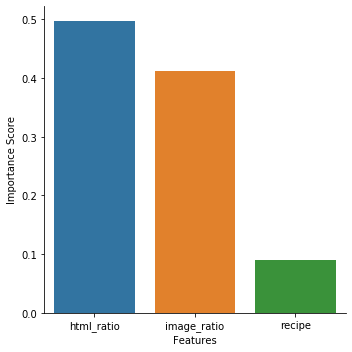

In [57]:
# Seaborn's factorplot draws a categorical plot onto a FacetGrid WITH COLORS!
sns.factorplot(x='Features', y='Importance Score', kind='bar', data = features_df);

 ### Demo: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance.

In [64]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# cross_val_score(estimator, features, target, chosen scoring method) assigned to the variable "scores."
# scores will be a numpy array
scores = cross_val_score(model_3, X, y, scoring='roc_auc', cv = 5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

# A for loop for running a Random Forest Classifier with n-estimators (or number of trees in your forest).
# The is 1 to 100 in steps of 10 - range(start, end, step)
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv = 5)
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [0.60723446 0.60149863 0.66221509 0.61943611 0.62810221], Average AUC 0.6236973024730389
n trees: 1, CV AUC [0.53753849 0.54853517 0.59993127 0.54125726 0.55620219], Average AUC 0.5566928742880041
n trees: 11, CV AUC [0.60023394 0.59270445 0.6550814  0.63932286 0.61480901], Average AUC 0.6204303330162223
n trees: 21, CV AUC [0.60044441 0.60482148 0.66076414 0.63342137 0.62885209], Average AUC 0.625660698803684
n trees: 31, CV AUC [0.60805399 0.62140126 0.65743664 0.62675422 0.63053673], Average AUC 0.6288365685426786
n trees: 41, CV AUC [0.61664795 0.61386152 0.66115808 0.63645418 0.63474742], Average AUC 0.6325738299585832
n trees: 51, CV AUC [0.61922017 0.61689474 0.65974065 0.63335049 0.62896135], Average AUC 0.6316334815181547
n trees: 61, CV AUC [0.61408783 0.61322545 0.66790808 0.62807105 0.63014172], Average AUC 0.630686825440271
n trees: 71, CV AUC [0.61093354 0.61946045 0.66121396 0.63561111 0.6338528 ], Average AUC 0.6322143718780592
n trees: 81, CV AUC [0.61384104 0.6

##  Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the features and create a quick plot to visually express the _importance_ of those features
3. **Bonus**: Just like the `recipe` feature, add in similar **text** features and evaluate the performance.

### 1. Build a model with more relevant features

- Instantiate your model object
- Define your features (X) and your target (y)
- Fit your model

### 2a. Evaluate predictive performance for the given feature set

`Here's an example from some ship people won't stop talking about:`

`scores = cross_validation.cross_val_score(model, titanic[features] (or X), titanic[target] (or y), cv=10)`

In [ ]:
# Evaluate with cross_val_score


### 2b. Evaluating feature importances 

`If unsure how to proceed, review the demo earlier in the notebook regarding extracting the importance of features and the subsequent use of seaborn to visually display those feature importances.`

In [1]:
# Get columns and their importance scores


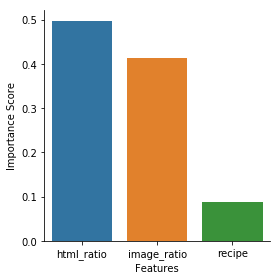

In [36]:
# Seaborn's factorplot STILL draws a categorical plot onto a FacetGrid WITH COLORS!
# What a time to be alive!


### 3. BONUS!!! Add in text features (strings, objects) and do it all over again!

`How many text columns options do you have?`

In [37]:
data.get_dtype_counts()

float64    12
int64      10
object      8
dtype: int64

`What are your text column options?`

In [38]:
#data.loc[:, data.dtypes == object].columns
data.select_dtypes(exclude=[np.number]).columns

Index([u'url', u'boilerplate', u'alchemy_category', u'alchemy_category_score',
       u'is_news', u'news_front_page', u'title', u'body'],
      dtype='object')

### Now create a new model with a text features or many text features

In [5]:
# Here's an example:

#Check for keywords in the title
data['PhotoInTitle'] = data['title'].fillna('').str.lower().str.contains('photo').astype(int)

# New X with an additional feature


# Still the same target variable "label"


# Fit a model on your data


### Evaluate your new text-inclusive model

In [40]:
# cross_val_score(estimator, features, target, chosen scoring method)
# assigned to the variable "scores"



With additional text column(s): 
CV AUC [0.61245758 0.64639858 0.63461389], Average AUC 0.631156681268


### Find and visually express the feature importances of your new model

In [41]:
# Get columns and their importance scores



,Features,Importance Score
1,html_ratio,0.489499
0,image_ratio,0.412628
2,recipe,0.092319
3,PhotoInTitle,0.005554


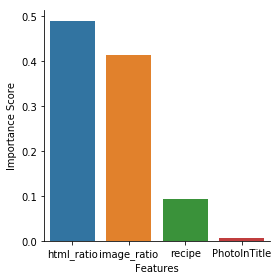

In [42]:
# Seaborn's factorplot STILL draws a categorical plot onto a FacetGrid WITH COLORS!
# What a time to be alive!!!


### BUT WAIT, THERE'S MORE BONUSES! 

<a href="https://imgflip.com/i/253hro"><img src="https://i.imgflip.com/253hro.jpg" title="made at imgflip.com"/></a>

### You can also tune your Random Forest Classifier hyperparameters using GridsearchCV!

`Here's an example of gridsearchCV parameter dictionary from good old kNN:`

`knn_dict = {
    'n_neighbors': [10, 12, 14, 16],
    'p': [1, 2],
    'weights': ['uniform', 'distance']}`


You can find parameter options here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [8]:
# Import GridSearchCV from sklearn's model selection library
from sklearn.model_selection import GridSearchCV

print('Processing GridSearch. Please hold for the next available set of outputs.\n')
# Review the plethora of hyperparameter options for Random Forest Classifiers, and
# then fill in some options for each hyperparameter you selected in a similar format
# as the kNN example.
gd_parameters = {   }

# Instantiate a new model object
rf = RandomForestClassifier(random_state=42)

gd_model = GridSearchCV(rf, gd_parameters, n_jobs = -1, cv=10)

# Fit your model


# Find your best combination of parameters and 
# the score associated with that combinations
print(gd_model.best_params_)
#print(gd_model.best_estimator_)
print(gd_model.best_score_)

### Classification not for you? Fancy yourself a regression aficionado? 
### That's just fine! Scikit's got your back.

`The Ames Housing Training and Test .csvs are available for you to lexplore the Regressor versions of Decision Trees
and Random Forests.`

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load data
ames_train = pd.read_csv("./Ames_train.csv")
ames_test = pd.read_csv("./Ames_test.csv")